In [1]:
from ler.rates import LeR
from ler.utils import get_param_from_json
import numpy as np
import matplotlib.pyplot as plt

Setting multiprocessing start method to 'fork'


In [ ]:

ler = LeR(verbose=True, lens_model_list = ['EPL_NUMBA', 'SHEAR'])

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
merger_rate_density interpolator will be loaded from ./interpolator_pickle/merger_rate_density/merger_rate_density_0.pickle
z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_0.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_0.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_1.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_ewoud/velocity_d

In [28]:
# image_position_analytical does not work 
lensed_param = ler.selecting_n_lensed_detectable_events(
    size=10000,
    batch_size=200000,
    snr_threshold=[8.0, 8.0],
    num_img=[1, 1],
    resume=False,
    detectability_condition='step_function',
    output_jsonfile='n_lensed_param_detectable_EPL.json',
    meta_data_file='meta_lensed_param_detectable_EPL.json',
    trim_to_size=False,
    nan_to_num=False,
)

removing ./ler_data/n_lensed_param_detectable_EPL.json and ./ler_data/meta_lensed_param_detectable_EPL.json if they exist
collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 62.32it/s]


given detectability_condition == step_function
collected number of detectable events =  918
total number of events =  200000
total rate (yr^-1): 1.0417956199386493


100%|████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 100.28it/s]


given detectability_condition == step_function
collected number of detectable events =  1883
total number of events =  400000
total rate (yr^-1): 1.0684646799261854


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 86.53it/s]


given detectability_condition == step_function
collected number of detectable events =  2860
total number of events =  600000
total rate (yr^-1): 1.0818937810546612


100%|████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 110.07it/s]


given detectability_condition == step_function
collected number of detectable events =  3818
total number of events =  800000
total rate (yr^-1): 1.0832177769405673


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 62.94it/s]


given detectability_condition == step_function
collected number of detectable events =  4730
total number of events =  1000000
total rate (yr^-1): 1.0735715212003945


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 62.97it/s]


given detectability_condition == step_function
collected number of detectable events =  5623
total number of events =  1200000
total rate (yr^-1): 1.0635469809213915


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 74.55it/s]


given detectability_condition == step_function
collected number of detectable events =  6564
total number of events =  1400000
total rate (yr^-1): 1.0641684483780414


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 54.72it/s]


given detectability_condition == step_function
collected number of detectable events =  7522
total number of events =  1600000
total rate (yr^-1): 1.067046112905572


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 64.41it/s]


given detectability_condition == step_function
collected number of detectable events =  8483
total number of events =  1800000
total rate (yr^-1): 1.069662580965815


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 69.05it/s]


given detectability_condition == step_function
collected number of detectable events =  9410
total number of events =  2000000
total rate (yr^-1): 1.0678972531179403


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 64.77it/s]


given detectability_condition == step_function
collected number of detectable events =  10352
total number of events =  2200000
total rate (yr^-1): 1.0680004216285301
storing detectable lensed params in ./ler_data/n_lensed_param_detectable_EPL.json
storing meta data in ./ler_data/meta_lensed_param_detectable_EPL.json


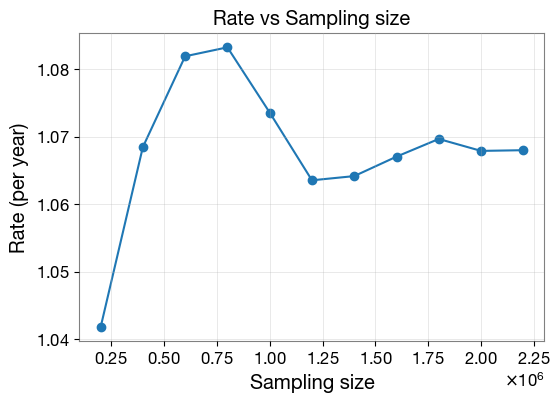

In [29]:
# Plot the diagnostics for the lensed events
meta_data_lensed = get_param_from_json("./ler_data/meta_lensed_param_detectable_EPL.json")
plt.figure(figsize=(6,4))
plt.plot(meta_data_lensed['events_total'], meta_data_lensed['total_rate'], 'o-')
plt.xlabel(r"Sampling size")
plt.ylabel(r"Rate (per year)")
plt.title(r"Rate vs Sampling size")
plt.grid(alpha=0.4)
#plt.savefig("./"+ler_directory+"/diagnosis02_rate_convergence_lensed.pdf", bbox_inches='tight')
plt.show()

In [30]:
table_column_data = {}  
table_column_data['lensed_rate_per_year'] = meta_data_lensed['total_rate'][-1]

# Get the lensed parameters
lensed_params = get_param_from_json("./ler_data/n_lensed_param_detectable.json")

# Get the number of images above snr threshold of 8:
n_images =np.sum(lensed_params['optimal_snr_net']>8, axis=1)

table_column_data['2_images_fraction'] = np.sum(n_images==2)/float(len(n_images))
table_column_data['3_images_fraction'] = np.sum(n_images==3)/float(len(n_images))
table_column_data['4_images_fraction'] = np.sum(n_images==4)/float(len(n_images))

# Check how many events have magnification larger than a given value
magnifications = lensed_params['magnifications']
magnifications[np.isnan(magnifications)] == 0 # Clear nans
magnifications_abs_total = np.sum(np.abs(magnifications), axis=1)

# Magnifications above 40, 100, 1000
table_column_data['mu_bigger_than_40'] = np.sum(magnifications_abs_total > 40)/float(len(magnifications_abs_total))
table_column_data['mu_bigger_than_100'] = np.sum(magnifications_abs_total > 100)/float(len(magnifications_abs_total))
table_column_data['mu_bigger_than_1000'] = np.sum(magnifications_abs_total > 1000)/float(len(magnifications_abs_total))


In [26]:
table_column_data

{'lensed_rate_per_year': 1.048811078658775,
 '2_images_fraction': 0.7388328530259366,
 '3_images_fraction': 0.18659942363112392,
 '4_images_fraction': 0.07456772334293948,
 'mu_bigger_than_40': 0.5371037463976945,
 'mu_bigger_than_100': 0.27089337175792505,
 'mu_bigger_than_1000': 0.006844380403458214}

In [31]:
table_column_data

{'lensed_rate_per_year': 1.0680004216285301,
 '2_images_fraction': 0.7388328530259366,
 '3_images_fraction': 0.18659942363112392,
 '4_images_fraction': 0.07456772334293948,
 'mu_bigger_than_40': 0.5371037463976945,
 'mu_bigger_than_100': 0.27089337175792505,
 'mu_bigger_than_1000': 0.006844380403458214}